In [ ]:
!git clone https://github.com/komeisugiura/defn18.git
!cd defn18 && pip install -r requirements.txt

Cloning into 'defn18'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25 (from 1)
Receiving objects: 100% (25/25), 1.80 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (4/4), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.5/245.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 64.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for outp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p /content/defn_feature_database_v1


In [ ]:
# List the contents of the defn_input_database directory to confirm the files
!ls /content/drive/MyDrive/defn_feature_database_v1/defn_input_database


charval2017X_C24_test_feat.csv.gz	  charval2017X_M24_test_feat.csv.gz
charval2017X_C24_test_label.csv.gz	  charval2017X_M24_test_label.csv.gz
charval2017X_C24_train_feat.csv.gz	  charval2017X_M24_train_feat.csv.gz
charval2017X_C24_train_label.csv.gz	  charval2017X_M24_train_label.csv.gz
charval2017X_C24_validation_feat.csv.gz   charval2017X_M24_validation_feat.csv.gz
charval2017X_C24_validation_label.csv.gz  charval2017X_M24_validation_label.csv.gz


In [ ]:
import gzip
import shutil
import os

# Function to extract .gz files
def extract_gz(file_path, output_dir):
    output_file = os.path.join(output_dir, os.path.basename(file_path).replace('.gz', ''))
    with gzip.open(file_path, 'rb') as f_in:
        with open(output_file, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    return output_file

# Path to the folder containing the .gz files
input_folder = '/content/drive/MyDrive/defn_feature_database_v1/defn_input_database'

# List all .csv.gz files in the defn_input_database directory
gz_files = [f for f in os.listdir(input_folder) if f.endswith('.csv.gz')]

# Create a folder to store extracted files
output_dir = '/content/defn_feature_database_v1/extracted_data/'
os.makedirs(output_dir, exist_ok=True)

# Extract each .csv.gz file
for gz_file in gz_files:
    file_path = os.path.join(input_folder, gz_file)
    extracted_file = extract_gz(file_path, output_dir)
    print(f"Extracted: {extracted_file}")


Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_C24_validation_label.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_C24_train_label.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_C24_train_feat.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_C24_validation_feat.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_C24_test_feat.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_C24_test_label.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_M24_test_label.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_M24_test_feat.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_M24_train_label.csv
Extracted: /content/defn_feature_database_v1/extracted_data/charval2017X_M24_validation_feat.csv
Extracted: /content/defn_feature_database_v1/extracted_data/char

In [ ]:
# List the extracted files to verify
!ls /content/defn_feature_database_v1/extracted_data/


charval2017X_C24_test_feat.csv	       charval2017X_M24_test_feat.csv
charval2017X_C24_test_label.csv        charval2017X_M24_test_label.csv
charval2017X_C24_train_feat.csv        charval2017X_M24_train_feat.csv
charval2017X_C24_train_label.csv       charval2017X_M24_train_label.csv
charval2017X_C24_validation_feat.csv   charval2017X_M24_validation_feat.csv
charval2017X_C24_validation_label.csv  charval2017X_M24_validation_label.csv


In [ ]:
import pandas as pd

# Load the feature data (for example, charval2017X_C24_train_feat.csv)
feat_file = '/content/defn_feature_database_v1/extracted_data/charval2017X_C24_train_feat.csv'
features = pd.read_csv(feat_file)

# Load the label data (for example, charval2017X_C24_train_label.csv)
label_file = '/content/defn_feature_database_v1/extracted_data/charval2017X_C24_train_label.csv'
labels = pd.read_csv(label_file)

# Display the first few rows of the feature and label data
print("Features data:")
print(features.head())

print("\nLabels data:")
print(labels.head())


Features data:
   -0.723371  -0.942111  -0.615026  0.0120602  0.0142346  0.0604308  \
0  -0.723371  -0.942111  -0.615026    0.01206   0.014235   0.060431   
1  -0.723371  -0.942111  -0.615026    0.01206   0.014235   0.060431   
2  -0.723371  -0.942111  -0.615026    0.01206   0.014235   0.060431   
3  -0.723371  -0.942111  -0.615026    0.01206   0.014235   0.060431   
4  -0.485471  -0.714689  -0.502834    0.01206   0.014235   0.060431   

   -0.852019  0.209469  -0.0986002  -0.561568  ...  0.3  0.4  0.5  \
0  -0.955944  0.227410    0.031867  -0.597107  ...    0    0    0   
1  -1.076740  0.280964    0.003598  -0.516317  ...    0    0    0   
2  -0.963298  0.265170   -0.094417  -0.659817  ...    0    0    0   
3  -0.968968  0.250219   -0.063689  -0.742943  ...    0    0    0   
4  -1.660690  0.124479    0.319270   0.003829  ...    0    0    0   

    7.55430e-08  -1.12181  0.00000  0.00000.1  169  0.6  0.7  
0  6.271200e-08  -1.20265 -1.12181    0.00000  322  169    0  
1  6.014600e-08  

In [ ]:
import pandas as pd

# Load the feature data (for example, charval2017X_C24_train_feat.csv)
feat_file = '/content/defn_feature_database_v1/extracted_data/charval2017X_M24_train_feat.csv'
features = pd.read_csv(feat_file)

# Load the label data (for example, charval2017X_C24_train_label.csv)
label_file = '/content/defn_feature_database_v1/extracted_data/charval2017X_M24_train_label.csv'
labels = pd.read_csv(label_file)

# Display the first few rows of the feature and label data
print("Features data:")
print(features.head())

print("\nLabels data:")
print(labels.head())


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Optionally, convert the scaled features back into a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled features
print(scaled_features_df.head())


   -0.723371  -0.942111  -0.615026  0.0120602  0.0142346  0.0604308  \
0  -0.732124  -0.961054  -0.620052  -0.054962  -0.013606   0.009798   
1  -0.732124  -0.961054  -0.620052  -0.054962  -0.013606   0.009798   
2  -0.732124  -0.961054  -0.620052  -0.054962  -0.013606   0.009798   
3  -0.732124  -0.961054  -0.620052  -0.054962  -0.013606   0.009798   
4  -0.498046  -0.736734  -0.510138  -0.054962  -0.013606   0.009798   

   -0.852019  0.209469  -0.0986002  -0.561568  ...       0.3       0.4  \
0  -0.959373  0.213183    0.000742  -0.625421  ... -0.134652 -0.370165   
1  -1.079675  0.268753   -0.027742  -0.545020  ... -0.134652 -0.370165   
2  -0.966697  0.252364   -0.126505  -0.687829  ... -0.134652 -0.370165   
3  -0.972344  0.236851   -0.095543  -0.770555  ... -0.134652 -0.370165   
4  -1.661236  0.106379    0.290339  -0.027379  ... -0.134652 -0.370165   

        0.5  7.55430e-08  -1.12181   0.00000  0.00000.1       169       0.6  \
0 -0.349616    -0.195403 -2.472345 -2.322670   0.

In [ ]:
# Check the shape of the labels DataFrame
print(labels.shape)


(150692, 2)


In [ ]:
print(labels.head())


   1  0
0  1  0
1  1  0
2  1  0
3  1  0
4  1  0


In [ ]:
import pandas as pd
import numpy as np

# Load features and labels
train_features = pd.read_csv('/content/drive/MyDrive/defn_feature_database_v1/defn_input_database/charval2017X_C24_train_feat.csv.gz')
train_labels = pd.read_csv('/content/drive/MyDrive/defn_feature_database_v1/defn_input_database/charval2017X_C24_train_label.csv.gz')

# Inspect the data
print(f"Training Features Shape: {train_features.shape}")
print(f"Training Labels Shape: {train_labels.shape}")


Training Features Shape: (150692, 79)
Training Labels Shape: (150692, 2)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train_features_scaled = scaler.fit_transform(train_features)

# Check the shape after scaling
print(f"Scaled Features Shape: {train_features_scaled.shape}")


Scaled Features Shape: (150692, 79)


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(train_features_scaled, train_labels, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}")


Training Set: (120553, 79), Validation Set: (30139, 79)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 512 neurons
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),  # Hidden layer with 256 neurons
    Dropout(0.3),
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(2, activation='softmax')  # Output layer with softmax activation (2 classes for solar flare prediction)
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          40,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,442 (802.51 KB)

 Trainable params: 205,442 (802.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8478 - loss: 0.3764 - val_accuracy: 0.8552 - val_loss: 0.3530
Epoch 2/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.8568 - loss: 0.3475 - val_accuracy: 0.8582 - val_loss: 0.3402
Epoch 3/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8594 - loss: 0.3382 - val_accuracy: 0.8579 - val_loss: 0.3375
Epoch 4/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.8626 - loss: 0.3290 - val_accuracy: 0.8610 - val_loss: 0.3270
Epoch 5/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.8659 - loss: 0.3189 - val_accuracy: 0.8638 - val_loss: 0.3233
Epoch 6/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.8662 - loss: 0.3153 - val_accuracy: 0.8642 - val_loss: 0.3233
Epoch 7/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.8704 - loss: 0.3104 - val_accuracy: 0.8669 - val_loss: 0.3140
Epoch 8/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8735 - loss: 

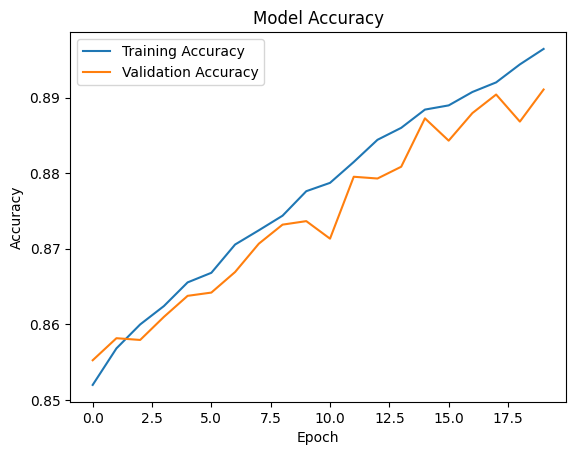

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Plot training history (optional, to check for overfitting or underfitting)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Save the C class model
model.save('solar_flare_model_C.keras')

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Fit your model (example for C class)
model_C = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 512 neurons
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),  # Hidden layer with 256 neurons
    Dropout(0.3),
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(2, activation='softmax')  # Output layer with softmax activation (2 classes for solar flare prediction)
])

# Fit the model
model_C.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_C = model_C.fit(X_train, y_train, epochs=20)

# Save the model
model_C.save('solar_flare_model_C.keras')

# Now, fit and save the scaler
scaler_C = StandardScaler()
scaler_C.fit(X_train)  # Fit scaler on your training data
pickle.dump(scaler_C, open('scaler_C.pkl', 'wb'))  # Save the fitted scaler to a file

# plt.plot(history_C.history['accuracy'], label='Training Accuracy')
# plt.plot(history_C.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3768/3768 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.8459 - loss: 0.3800
Epoch 2/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.8563 - loss: 0.3484
Epoch 3/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.8593 - loss: 0.3375
Epoch 4/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8635 - loss: 0.3272
Epoch 5/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.8654 - loss: 0.3199
Epoch 6/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8659 - loss: 0.3169
Epoch 7/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.8711 - loss: 0.3063
Epoch 8/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8720 - loss: 0.3042
Epoch 9/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.8767 - loss: 0.2975
Epoch 10/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8799 - loss: 0.2882
Epoch 11/20
3768/3768 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.8811 - loss: 0.2846
Epoch 12/20
3768/3768 ━━━━━━━━

AttributeError: 'History' object has no attribute 'history_C'

KeyError: 'val_accuracy'

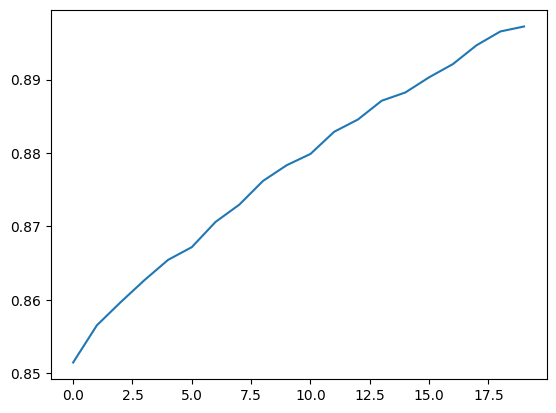

In [ ]:
plt.plot(history_C.history['accuracy'], label='Training Accuracy')
plt.plot(history_C.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load M Class data
feat_file_M = '/content/defn_feature_database_v1/extracted_data/charval2017X_M24_train_feat.csv'  # Replace with actual path
label_file_M = '/content/defn_feature_database_v1/extracted_data/charval2017X_M24_train_label.csv'  # Replace with actual path


features_M = pd.read_csv(feat_file_M)
labels_M = pd.read_csv(label_file_M)

# Scale the features
scaler_M = StandardScaler()
scaled_features_M = scaler_M.fit_transform(features_M)

from sklearn.model_selection import train_test_split

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(scaled_features_M, labels_M, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}")

# Define the neural network model for M class
model_M = Sequential([
    Dense(512, activation='relu', input_dim=scaled_features_M.shape[1]),  # Input layer
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(128, activation='relu'),  # Hidden layer
    Dense(2, activation='softmax')  # Output layer (2 classes for solar flare prediction)
])

# Compile the model
model_M.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model_M.summary()

# Train the model
history_M=model_M.fit(scaled_features_M, labels_M, epochs=5, batch_size=32)

# Save the M class model
model_M.save('solar_flare_model_M.keras')

Training Set: (120553, 79), Validation Set: (30139, 79)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │          40,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,442 (802.51 KB)

 Trainable params: 205,442 (802.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4710/4710 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9709 - loss: 0.1035
Epoch 2/5
4710/4710 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9740 - loss: 0.0837
Epoch 3/5
4710/4710 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9749 - loss: 0.0781
Epoch 4/5
4710/4710 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9775 - loss: 0.0694
Epoch 5/5
4710/4710 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.9790 - loss: 0.0654


AttributeError: 'History' object has no attribute 'history_M'

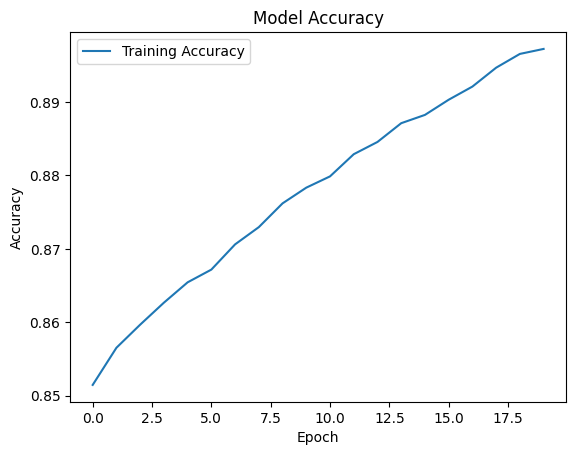

In [ ]:
plt.plot(history_C.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

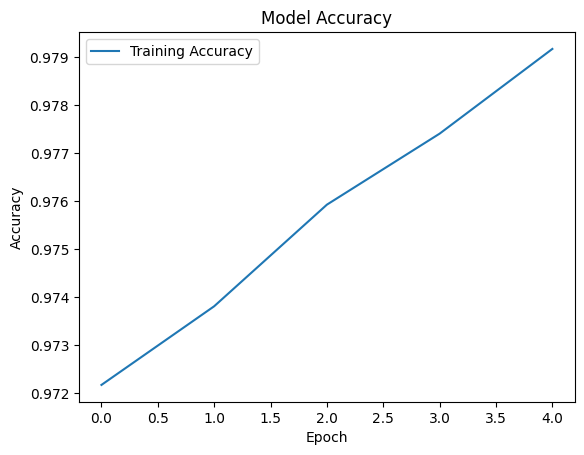

In [ ]:
plt.plot(history_M.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate on the validation set
val_loss, val_accuracy = model_M.evaluate(X_val, y_val)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0510
Validation Loss: 0.05372219160199165
Validation Accuracy: 0.9814525842666626


In [ ]:
# Now, fit and save the scaler
scaler_M = StandardScaler()
scaler_M.fit(scaled_features_M)  # Fit scaler on your training data
pickle.dump(scaler_M, open('scaler_M.pkl', 'wb'))  #

In [ ]:
!pip install tensorflow

In [ ]:
# Making predictions on the validation set
predictions = model.predict(X_val)

# Display the predictions (convert them to class labels if needed)
predicted_classes = np.argmax(predictions, axis=1)

# Display the first 10 predictions
print(predicted_classes[:10])

942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[0 0 1 0 0 0 0 1 0 0]


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf


In [ ]:
# Save your model in the new Keras format
model.save('solar_flare_model.keras')


In [ ]:
# Load the model from the .keras format
model = tf.keras.models.load_model('solar_flare_model.keras')


In [ ]:
import pandas as pd
import numpy as np

# Path to the test dataset
test_file_path = '/content/drive/MyDrive/defn_feature_database_v1/defn_input_database/charval2017X_C24_test_feat.csv.gz'

# Load the test dataset
test_data = pd.read_csv(test_file_path)

# Inspect the first few rows of the dataset
print(test_data.head())

# Assuming the first 79 columns are features (modify based on your dataset structure)
feature_columns = test_data.columns[:79]  # Select the first 79 columns

# Extract the feature values as a NumPy array
test_features = test_data[feature_columns].to_numpy()

# Print the shape of the feature array (should be [num_samples, 79])
print("Feature Array Shape:", test_features.shape)

# Extract a single sample for testing (for example, the first row)
sample_input = test_features[3]  # Select the first sample
print("Sample Input (First Row):", sample_input)

# Convert the sample to a comma-separated string (for Gradio interface testing)
comma_separated_input = ','.join(map(str, sample_input))
print("Comma-Separated Input for Gradio:", comma_separated_input)


   -0.442216  -0.563074  -0.432713  0.0120602  -1.83589  -0.930908  0.248206  \
0  -0.615234  -0.790496  -0.581368    0.01206  0.014235  -0.920692 -1.867910   
1   0.033583  -0.373556  -0.278449    0.01206  0.014235   0.060431  0.807495   
2   0.055210  -0.070327  -0.079307    0.01206  0.014235   0.060431 -0.280144   
3   1.915150   1.370010   2.652580    0.01206  0.014235   0.060431  1.160260   
4  -0.398962  -0.297749  -0.427104    0.01206  0.014235   0.060431 -0.008138   

   0.845847  -0.237253  -0.345763  ...  0.3  4  2   7.31720e-07  -0.135650  \
0  0.541959  -0.070050   0.291157  ...    0  0  0  7.317200e-07   -0.13565   
1  1.184020   0.640771   1.161940  ...    0  5  4  7.317200e-07   -0.13565   
2  0.774810  -0.111119   0.778939  ...    0  0  0  7.317200e-07   -0.13565   
3  0.618203   0.457410   1.061210  ...    0  0  0  7.317200e-07   -0.13565   
4  0.822572  -0.189168  -0.161096  ...    0  0  0  7.317200e-07   -0.13565   

   0.00311995  0.102740  141  58  126  
0     0.00

In [ ]:
import pandas as pd
import numpy as np

# Path to the test dataset
test_file_path = '/content/defn_feature_database_v1/extracted_data/charval2017X_M24_test_feat.csv'

# Load the test dataset
test_data = pd.read_csv(test_file_path)

# Inspect the first few rows of the dataset
print(test_data.head())

# Assuming the first 79 columns are features (modify based on your dataset structure)
feature_columns = test_data.columns[:79]  # Select the first 79 columns

# Extract the feature values as a NumPy array
test_features = test_data[feature_columns].to_numpy()

# Print the shape of the feature array (should be [num_samples, 79])
print("Feature Array Shape:", test_features.shape)

# Extract a single sample for testing (for example, the first row)
sample_input = test_features[20]  # Select the first sample
print("Sample Input (First Row):", sample_input)

# Convert the sample to a comma-separated string (for Gradio interface testing)
comma_separated_input = ','.join(map(str, sample_input))
print("Comma-Separated Input for Gradio:", comma_separated_input)


   -0.442216  -0.563074  -0.432713  0.0120602  -1.83589  -0.930908  0.248206  \
0  -0.615234  -0.790496  -0.581368    0.01206  0.014235  -0.920692 -1.867910   
1   0.033583  -0.373556  -0.278449    0.01206  0.014235   0.060431  0.807495   
2   0.055210  -0.070327  -0.079307    0.01206  0.014235   0.060431 -0.280144   
3   1.915150   1.370010   2.652580    0.01206  0.014235   0.060431  1.160260   
4  -0.398962  -0.297749  -0.427104    0.01206  0.014235   0.060431 -0.008138   

   0.845847  -0.237253  -0.345763  ...  0.3  4  2   7.31720e-07  -0.135650  \
0  0.541959  -0.070050   0.291157  ...    0  0  0  7.317200e-07   -0.13565   
1  1.184020   0.640771   1.161940  ...    0  5  4  7.317200e-07   -0.13565   
2  0.774810  -0.111119   0.778939  ...    0  0  0  7.317200e-07   -0.13565   
3  0.618203   0.457410   1.061210  ...    0  0  0  7.317200e-07   -0.13565   
4  0.822572  -0.189168  -0.161096  ...    0  0  0  7.317200e-07   -0.13565   

   0.00311995  0.102740  141  58  126  
0     0.00

In [ ]:
np.save('test_features.npy', X_val)
np.save('test_labels.npy', y_val)


In [ ]:
print(model.input_shape)


(None, 79)


In [ ]:
import pandas as pd

# Load the test feature and label files (replace with actual paths)
test_feat_file = '/content/defn_feature_database_v1/extracted_data/charval2017X_M24_test_feat.csv'  # Replace with actual path
test_label_file = '/content/defn_feature_database_v1/extracted_data/charval2017X_M24_test_label.csv'  # Replace with actual path

# Load the test data
test_features = pd.read_csv(test_feat_file)
test_labels = pd.read_csv(test_label_file)

# Example: Suppose you want to check the ground truth label for the 5th record
index = 5

# Get the feature record
test_record = test_features.iloc[index]
print(f"Test Record (Features) at index {index}:\n", test_record)

# Get the corresponding ground truth label (remember labels might be in one-hot encoded format)
ground_truth_label = test_labels.iloc[index]
print(f"Ground Truth Label at index {index}: {ground_truth_label}")

print(test_features.duplicated().sum())
print(test_labels.duplicated().sum())

print(f"Selected index: {index}")
test_record = test_features.iloc[index]
ground_truth_label = test_labels.iloc[index]
print(f"Test Record (Features) at index {index}:\n", test_record)
print(f"Ground Truth Label at index {index}: {ground_truth_label}")



Test Record (Features) at index 5:
 -0.442216      -0.723371
-0.563074      -0.942111
-0.432713      -0.615026
0.0120602       0.012060
-1.83589        0.014235
                 ...    
0.00311995     -0.135650
0.102740        0.003120
141           129.000000
58            141.000000
126            58.000000
Name: 5, Length: 79, dtype: float64
Ground Truth Label at index 5: 1    1
0    0
Name: 5, dtype: int64
0
31334
Selected index: 5
Test Record (Features) at index 5:
 -0.442216      -0.723371
-0.563074      -0.942111
-0.432713      -0.615026
0.0120602       0.012060
-1.83589        0.014235
                 ...    
0.00311995     -0.135650
0.102740        0.003120
141           129.000000
58            141.000000
126            58.000000
Name: 5, Length: 79, dtype: float64
Ground Truth Label at index 5: 1    1
0    0
Name: 5, dtype: int64


In [ ]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
import gradio as gr

# Load the trained models and scalers for M and C classes
model_M = tf.keras.models.load_model('solar_flare_model_M.keras')
model_C = tf.keras.models.load_model('solar_flare_model_C.keras')

scaler_M = pickle.load(open('scaler_M.pkl', 'rb'))
scaler_C = pickle.load(open('scaler_C.pkl', 'rb'))

# Load the M class and C class test data
test_feat_M = pd.read_csv('/content/defn_feature_database_v1/extracted_data/charval2017X_M24_test_feat.csv')
test_label_M = pd.read_csv('/content/defn_feature_database_v1/extracted_data/charval2017X_M24_test_label.csv')

test_feat_C = pd.read_csv('/content/defn_feature_database_v1/extracted_data/charval2017X_C24_test_feat.csv')
test_label_C = pd.read_csv('/content/defn_feature_database_v1/extracted_data/charval2017X_C24_test_label.csv')

# Function to get the ground truth label
def get_ground_truth(input_features, class_type="M"):
    features = np.array([float(x) for x in input_features.split(',')])

    if class_type == "M":
        for idx, row in test_feat_M.iterrows():
            if np.array_equal(features, row.values):
                return test_label_M.iloc[idx].values
    elif class_type == "C":
        for idx, row in test_feat_C.iterrows():
            if np.array_equal(features, row.values):
                return test_label_C.iloc[idx].values
    else:
        return "Invalid class type."

# Function to predict flare occurrence
def predict(input_text, class_type="M"):
    try:
        # Parse input features
        features = np.array([float(x) for x in input_text.split(',')])

        # Ensure input has exactly 79 features
        if len(features) != 79:
            return f"Error: Expected 79 features, but got {len(features)} features."

        features = features.reshape(1, -1)

        # Select model and scaler based on class type
        if class_type == "M":
            features_scaled = scaler_M.transform(features)
            model = model_M
        elif class_type == "C":
            features_scaled = scaler_C.transform(features)
            model = model_C
        else:
            return "Error: Invalid class type. Use 'M' or 'C'."

        # Make prediction
        predictions = model.predict(features_scaled)
        class_probabilities = predictions[0]

        # Format prediction output
        output = f"Class 0 represents: No flare occurrence\n"
        output += f"Class 1 represents: Flare occurrence\n"

        output += f"Class 0 probability: {round(class_probabilities[0], 2)}\n"

        output += f"Class 1 probability: {round(class_probabilities[1], 2)}\n"

        if class_probabilities[0] > class_probabilities[1]:
            output += f"Prediction: Class 0 (No flare detected)"
        else:
            output += f"Prediction: Class 1 (Flare detected)"

        # Get ground truth label
        ground_truth = get_ground_truth(input_text, class_type)
        return output, f"Ground Truth Label: {ground_truth}"

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface
inputs = gr.Textbox(label="Enter the 79 Features (Comma Separated) for tesing Flare Occurrence ")
class_type = gr.Dropdown(["M", "C"], label="Select Class Type", value="M")
output = gr.Textbox(label="Prediction Output")
ground_truth_output = gr.Textbox(label="Ground Truth Label")

# Create Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[inputs, class_type],
    outputs=[output, ground_truth_output],
    live=True
)

# Launch the interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://06af7e5a7704ef6975.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
